In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
np.set_printoptions(precision=2)

fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits= fruits[feature_names_fruits]
y_fruits= fruits['fruit_label']
target_names_labels = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_transform = scaler.transform(example_fruit)

print(target_names_labels[knn.predict(example_fruit_transform)[0]-1])

0.954545454545
1.0
mandarin


<IPython.core.display.Javascript object>


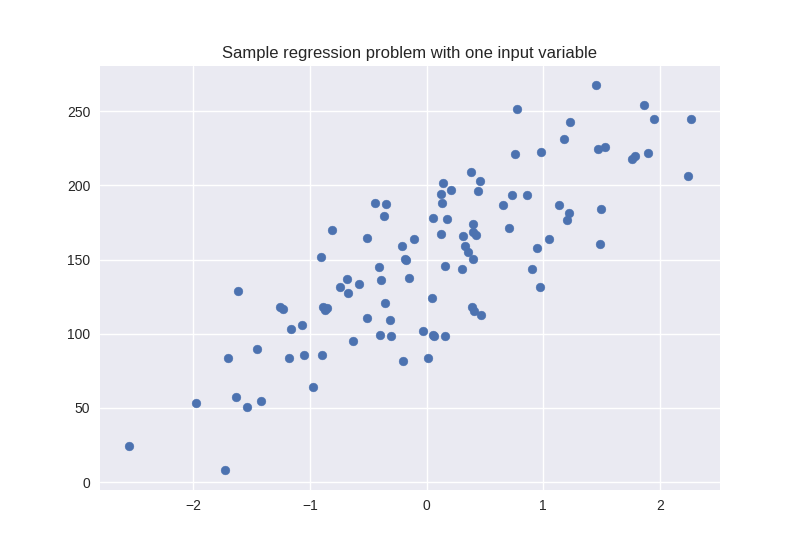

<IPython.core.display.Javascript object>


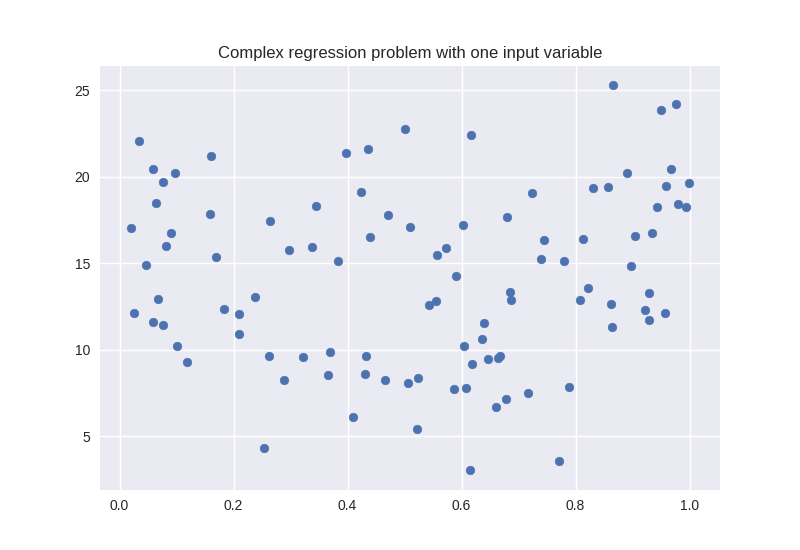

<IPython.core.display.Javascript object>


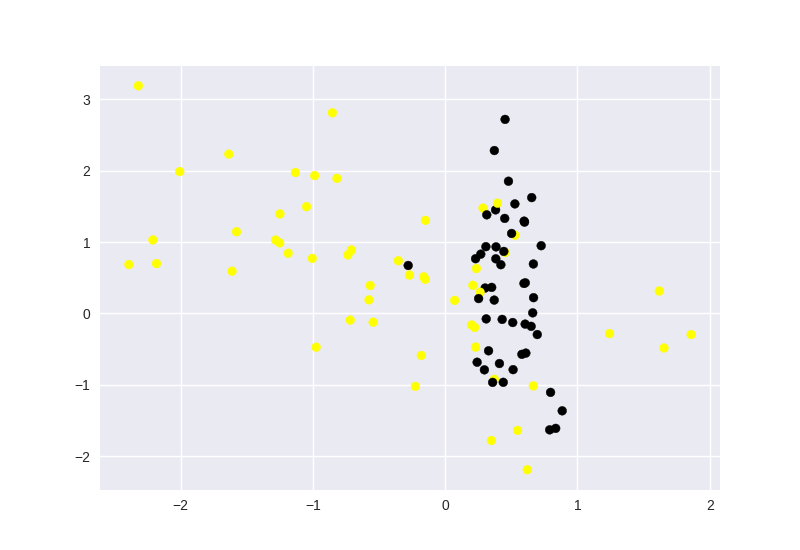

<IPython.core.display.Javascript object>


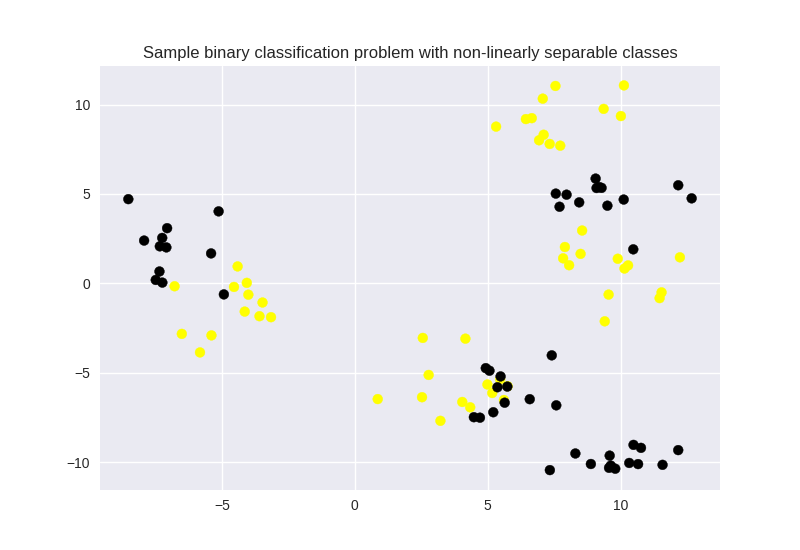

In [3]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')

X_R1, y_R1 = make_regression(n_samples=100, n_informative=1, n_features=1, bias=150.0, noise=30, random_state=0)

plt.scatter(X_R1, y_R1, marker='o', s=40)
plt.show()


from sklearn.datasets import make_friedman1

plt.figure()
plt.title('Complex regression problem with one input variable')

X_F1, y_F1 = make_friedman1(n_samples=100, n_features=7, random_state=0)
plt.scatter(X_F1[:, 2], y_F1, marker='o', s=40)
plt.show()

plt.figure()
X_C2, y_C2 = make_classification(n_samples=100, n_features=2,
                                 n_informative=2, n_redundant=0, 
                                 n_clusters_per_class=1 ,flip_y=0.1,
                                 class_sep=0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2, marker='o', s=40, cmap=cmap_bold)
plt.show()

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

In [4]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

knnreg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print(knnreg.score(X_test, y_test))

[ 231.71  148.36  150.59  150.59   72.15  166.51  141.91  235.57  208.26
  102.1   191.32  134.5   228.32  148.36  159.17  113.47  144.04  199.23
  143.19  166.51  231.71  208.26  128.02  123.14  141.91]
0.424680085823


In [6]:
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state=0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize=10, label='predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', markersize=10, label='True Value', alpha=0.8)
    thisaxis.legend()
    
plt.tight_layout()


<IPython.core.display.Javascript object>

In [7]:
fig, subaxes = plt.subplots(5, 1, figsize=(5, 20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression')
    thisaxis.set_title('KNN Regression (K={})\nTrain $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    

<IPython.core.display.Javascript object>

In [8]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

[ 45.71]
148.445753457
0.678595077114
0.491596159349


In [9]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker='o', s=40, alpha=0.8)
plt.plot(X_R1, linreg.coef_*X_R1 + linreg.intercept_, 'r-')
plt.title('Least square linear regression')
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

[  1.62e-03  -9.43e+01   1.36e+01  -3.13e+01  -8.15e-02  -1.69e+01
  -2.43e-03   1.53e+00  -1.39e-02  -7.72e+00   2.28e+01  -5.66e+00
   9.35e+00   2.07e-01  -7.43e+00   9.66e-03   4.38e-03   4.80e-03
  -4.46e+00  -1.61e+01   8.83e+00  -5.07e-01  -1.42e+00   8.18e+00
  -3.87e+00  -3.54e+00   4.49e+00   9.31e+00   1.74e+02   1.18e+01
   1.51e+02  -3.30e+02  -1.35e+02   6.95e-01  -2.38e+01   2.77e+00
   3.82e-01   4.39e+00  -1.06e+01  -4.92e-03   4.14e+01  -1.16e-03
   1.19e+00   1.75e+00  -3.68e+00   1.60e+00  -8.42e+00  -3.80e+01
   4.74e+01  -2.51e+01  -2.88e-01  -3.66e+01   1.90e+01  -4.53e+01
   6.83e+02   1.04e+02  -3.29e+02  -3.14e+01   2.74e+01   5.12e+00
   6.92e+01   1.98e-02  -6.12e-01   2.65e+01   1.01e+01  -1.59e+00
   2.24e+00   7.38e+00  -3.14e+01  -9.78e-05   5.02e-05  -3.48e-04
  -2.50e-04  -5.27e-01  -5.17e-01  -4.10e-01   1.16e-01   1.46e+00
  -3.04e-01   2.44e+00  -3.66e+01   1.41e-01   2.89e-01   1.77e+01
   5.97e-01   1.98e+00  -1.36e-01  -1.85e+00]
-1728.1306726
0.

In [4]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

linridge = Ridge(alpha = 20).fit(X_train, y_train)

print(linridge.coef_)
print(linridge.intercept_)
print(linridge.score(X_train, y_train))
print(linridge.score(X_test, y_test))

[  1.95e-03   2.19e+01   9.56e+00  -3.59e+01   6.36e+00  -1.97e+01
  -2.81e-03   1.66e+00  -6.61e-03  -6.95e+00   1.72e+01  -5.63e+00
   8.84e+00   6.79e-01  -7.34e+00   6.70e-03   9.79e-04   5.01e-03
  -4.90e+00  -1.79e+01   9.18e+00  -1.24e+00   1.22e+00   1.03e+01
  -3.78e+00  -3.73e+00   4.75e+00   8.43e+00   3.09e+01   1.19e+01
  -2.05e+00  -3.82e+01   1.85e+01   1.53e+00  -2.20e+01   2.46e+00
   3.29e-01   4.02e+00  -1.13e+01  -4.70e-03   4.27e+01  -1.23e-03
   1.41e+00   9.35e-01  -3.00e+00   1.12e+00  -1.82e+01  -1.55e+01
   2.42e+01  -1.32e+01  -4.20e-01  -3.60e+01   1.30e+01  -2.81e+01
   4.39e+01   3.87e+01  -6.46e+01  -1.64e+01   2.90e+01   4.15e+00
   5.34e+01   1.99e-02  -5.47e-01   1.24e+01   1.04e+01  -1.57e+00
   3.16e+00   8.78e+00  -2.95e+01  -2.33e-04   3.14e-04  -4.14e-04
  -1.80e-04  -5.74e-01  -5.18e-01  -4.21e-01   1.53e-01   1.33e+00
   3.85e+00   3.03e+00  -3.78e+01   1.38e-01   3.08e-01   1.57e+01
   3.31e-01   3.36e+00   1.61e-01  -2.68e+00]
-3352.42303585
0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20).fit(X_train_scaled, y_train)

print(linridge.coef_)
print(linridge.intercept_)
print(linridge.score(X_train_scaled, y_train))
print(linridge.score(X_test_scaled, y_test))

In [6]:
from sklearn.linear_model import Ridge

for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test) 
    num_coeff_bigger = np.sum(abs(linridge.coef_)>1.0)
    print(this_alpha, num_coeff_bigger, r2_train, r2_test)

0 4 0.763634801778 0.204097652957
1 2 0.562495767619 0.341009303347
10 0 0.164398300627 0.114555872877
20 0 0.0915957315696 0.0640645655753
50 0 0.0393249435485 0.0274472098792
100 0 0.0201545241249 0.0139954429941
1000 0 0.00206188108869 0.00130534245573


In [5]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter=10000).fit(X_train_scaled, y_train)

print(linlasso.intercept_)
print(linlasso.coef_)
print(np.sum(linlasso.coef_ != 0))
print(linlasso.score(X_train_scaled, y_train))
print(linlasso.score(X_test_scaled, y_test))

for e in sorted(list(zip(list(X_crime), linlasso.coef_)), key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

1186.612062
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
20
0.630701366871
0.623772585702
	PctKidsBornNeverMar, 1488.365
	PctKids2Par, -1188.740
	HousVacant, 459.538
	PctPersDenseHous, 339.045
	NumInShelters, 264.932
	MalePctDivorce, 259.329
	PctWorkMom, -2

In [6]:
for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    print('Alpha = {:.2f}\nFeatues kept:{}, r-squared training: {:.2f}, r-squared test: {:.2f}\n'.format(alpha, np.sum(linlasso.coef_!=0), r2_train, r2_test))

Alpha = 0.50
Featues kept:35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Featues kept:25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Featues kept:20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Featues kept:17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Featues kept:12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Featues kept:6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Featues kept:2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Featues kept:1, r-squared training: 0.31, r-squared test: 0.30



In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))


X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state=0)
linreg = Ridge().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

[  4.42   6.     0.53  10.24   6.55  -2.02  -0.32]
1.54250919754
0.722375020737
0.722133957693
[  3.41e-12   1.66e+01   2.67e+01  -2.21e+01   1.24e+01   6.93e+00
   1.05e+00   3.71e+00  -1.34e+01  -5.73e+00   1.62e+00   3.66e+00
   5.05e+00  -1.46e+00   1.95e+00  -1.51e+01   4.87e+00  -2.97e+00
  -7.78e+00   5.15e+00  -4.65e+00   1.84e+01  -2.22e+00   2.17e+00
  -1.28e+00   1.88e+00   1.53e-01   5.62e-01  -8.92e-01  -2.18e+00
   1.38e+00  -4.90e+00  -2.24e+00   1.38e+00  -5.52e-01  -1.09e+00]
-3.20567439893
0.968599683017
0.804643755051
[ 0.    2.23  4.73 -3.15  3.86  1.61 -0.77 -0.15 -1.75  1.6   1.37  2.52
  2.72  0.49 -1.94 -1.63  1.51  0.89  0.26  2.05 -1.93  3.62 -0.72  0.63
 -3.16  1.29  3.55  1.73  0.94 -0.51  1.7  -1.98  1.81 -0.22  2.88 -0.89]
5.41809304926
0.825762061392
0.825111520976


In [12]:
my_data = np.random.random((210,8)) #recfromcsv('LIAB.ST.csv', delimiter='\t')
print(my_data)
new_col = my_data.sum(1)[...,None] # None keeps (n, 1) shape
new_col.shape
#(210,1)
all_data = np.append(my_data, new_col, 1)
all_data.shape

[[ 0.15  0.16  0.52 ...,  0.29  0.15  0.3 ]
 [ 0.37  0.34  0.23 ...,  0.56  0.73  0.08]
 [ 0.54  0.96  0.14 ...,  0.67  0.12  0.14]
 ..., 
 [ 0.23  0.87  0.48 ...,  0.05  0.5   0.25]
 [ 0.28  0.17  0.05 ...,  0.64  0.41  0.66]
 [ 0.34  0.12  0.14 ...,  0.81  0.42  0.69]]


(210, 9)